<a href="https://colab.research.google.com/github/npgeorge/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Assignment_Nicholas_George_LS_DS_121_Join_and_Reshape_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [20]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2019-09-20 03:16:14--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.179.61
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.179.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  39.0MB/s    in 5.2s    

2019-09-20 03:16:20 (37.5 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [21]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [22]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01/instacart_2017_05_01


In [23]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


# Assignment

## Join Data Practice

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

In [0]:
##### YOUR CODE HERE #####

import pandas as pd

#need the product name column and how many times someone ordered the item, for instance if they ordered 2 of one product
#columns we need
#product_name
#product_id
#order_id
#reordered

In [25]:
aisles = pd.read_csv('aisles.csv')
aisles.head(20)
#probably not useful for this assignment

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
5,6,other
6,7,packaged meat
7,8,bakery desserts
8,9,pasta sauce
9,10,kitchen supplies


In [26]:
aisles.shape

(134, 2)

In [27]:
departments = pd.read_csv('departments.csv')
departments.head()
#departments.shape

#also not useful for this question

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [28]:
order_products__prior = pd.read_csv('order_products__prior.csv')
order_products__prior.head()
#ok so add the reodered column, ensure it aligns with the proper product id

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [29]:
order_products__train = pd.read_csv('order_products__prior.csv')
order_products__train.head()

#training data set, so going to use the "prior" for the reordered column

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [30]:
orders = pd.read_csv('orders.csv')
orders.head(10)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [31]:
products = pd.read_csv('products.csv')
products.head(20)

#products data frame as the product name, not sure if this will be useful.

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
5,6,Dry Nose Oil,11,11
6,7,Pure Coconut Water With Orange,98,7
7,8,Cut Russet Potatoes Steam N' Mash,116,1
8,9,Light Strawberry Blueberry Yogurt,120,16
9,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7


In [32]:
products['product_name']

0                               Chocolate Sandwich Cookies
1                                         All-Seasons Salt
2                     Robust Golden Unsweetened Oolong Tea
3        Smart Ones Classic Favorites Mini Rigatoni Wit...
4                                Green Chile Anytime Sauce
5                                             Dry Nose Oil
6                           Pure Coconut Water With Orange
7                        Cut Russet Potatoes Steam N' Mash
8                        Light Strawberry Blueberry Yogurt
9           Sparkling Orange Juice & Prickly Pear Beverage
10                                       Peach Mango Juice
11                              Chocolate Fudge Layer Cake
12                                       Saline Nasal Mist
13                          Fresh Scent Dishwasher Cleaner
14                                Overnight Diapers Size 6
15                           Mint Chocolate Flavored Syrup
16                                       Rendered Duck F

In [33]:
#so, I need product_name, product_id, order_id, and whether or not they reordered

#first i'll grab the products columns I need
prod_columns = ['product_id','product_name']
products = products_sub = products[prod_columns]
products.head()

,product_id,product_name
0,1,Chocolate Sandwich Cookies
1,2,All-Seasons Salt
2,3,Robust Golden Unsweetened Oolong Tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...
4,5,Green Chile Anytime Sauce


In [34]:
products.shape

(49688, 2)

In [35]:
#just need to grab the order_id from the orders column
orders_column = ['order_id']
orders = orders_sub = orders[orders_column]
orders.head()

,order_id
0,2539329
1,2398795
2,473747
3,2254736
4,431534


In [36]:
orders.shape

(3421083, 1)

In [0]:
#and then lastly need to grab whether or not they reordered

In [38]:
#columns = ['product_id','product_name','order_id', 'reordered']
#merged = pd.merge(______, ____________)
#merged.head()

NameError: ignored

## Reshape Data Section

- Replicate the lesson code
- Complete the code cells we skipped near the beginning of the notebook
- Table 2 --> Tidy
- Tidy --> Table 2
- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [0]:
import seaborn as sns
flights = sns.load_dataset('flights')

In [40]:
##### YOUR CODE HERE #####
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2019-09-20 03:17:36--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.137.190
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.137.190|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  70.9MB/s    in 2.8s    

2019-09-20 03:17:39 (70.9 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [41]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [42]:
%cd /content/

/content


In [43]:
!ls -lh *.csv

ls: cannot access '*.csv': No such file or directory


In [44]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [45]:
!ls -lh *.csv
#!ls is used to list the current files in the directory
#rm is used to remove/delete files
#the *.csv is used to show ANY filename that ends with .csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


In [0]:
!rm -rf instacart_2017_05_01/

In [48]:
!rm instacart_online_grocery_shopping_2017_05_01.tar.gz

rm: cannot remove 'instacart_online_grocery_shopping_2017_05_01.tar.gz': No such file or directory


Download with Python

In [49]:
%cd /content/

/content


In [50]:
import urllib.request

url = 'https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz'
file_name = 'instacart_online_grocery_shopping_2017_05_01.tar.gz'

urllib.request.urlretrieve(url, file_name)

('instacart_online_grocery_shopping_2017_05_01.tar.gz',
 <http.client.HTTPMessage at 0x7ff30dcac438>)

In [0]:
import tarfile

tar = tarfile.open(file_name, 'r:gz')
tar.extractall()
tar.close()

In [0]:
import os

In [53]:
print(os.getcwd())

/content


In [0]:
os.chdir('/content/instacart_2017_05_01/')

In [55]:
print(os.getcwd())

/content/instacart_2017_05_01


In [56]:
import glob

glob.glob('/content/instacart_2017_05_01/*.csv')

['/content/instacart_2017_05_01/aisles.csv',
 '/content/instacart_2017_05_01/departments.csv',
 '/content/instacart_2017_05_01/order_products__train.csv',
 '/content/instacart_2017_05_01/orders.csv',
 '/content/instacart_2017_05_01/order_products__prior.csv',
 '/content/instacart_2017_05_01/products.csv']

# **Join Datasets**

## **Goal: Reproduce this example**

The first two order for user id 1:

In [57]:
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*vYGFQCafJtGBBX5mbl0xyw.png'
example = Image(url=url, width=600)

display(example)

# **Load Data**

Here's a list of all six CSV filenames

In [58]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


For each CSV
- Load it with pandas
- Look at the dataframe's shape
- Look at its head (first rows)
- display (example)
- Which columns does it have in common with the example we want to reproduce?

In [0]:
import pandas as pd

## **aisles**

In [60]:
aisles = pd.read_csv('aisles.csv')
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [61]:
aisles.shape

(134, 2)

In [62]:
display(example)

In [63]:
aisles.describe()

,aisle_id
count,134.000000
mean,67.500000
std,38.826537
min,1.000000
25%,34.250000
50%,67.500000
75%,100.750000
max,134.000000


In [64]:
aisles.describe(exclude='number')

,aisle
count,134
unique,134
top,frozen juice
freq,1


## **departments**

In [65]:
departments = pd.read_csv('departments.csv')
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [66]:
departments.shape

(21, 2)

In [67]:
display(example)

## **order_products__prior**

In [68]:
order_products__prior = pd.read_csv('order_products__prior.csv')
order_products__prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [69]:
order_products__prior.shape

(32434489, 4)

We need:
- order_id
- product_id
- add_to_cart_order

## **order_products__train**

In [70]:
order_products__train = pd.read_csv('order_products__train.csv')
order_products__train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [71]:
order_products__train.shape

(1384617, 4)

## **orders**

In [90]:
orders = pd.read_csv('orders.csv')
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [73]:
display(example)

We need:
- order_id
- user_id
- order_number
- order_dow
- order_hour_of_day

## **products**

In [74]:
products = pd.read_csv('products.csv')
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [75]:
products.shape

(49688, 4)

## **Concatenate order_productsprior and order_productstrain**


In [76]:
order_products = pd.concat([order_products__prior, order_products__train])
order_products.shape

(33819106, 4)

In [77]:
print(order_products__prior.shape, order_products__train.shape, order_products.shape)

(32434489, 4) (1384617, 4) (33819106, 4)


In [0]:
assert len(order_products__prior) + len(order_products__train) == len(order_products)

In [79]:
display(example)

Short groupby example

In [80]:
order_products.groupby('order_id')['product_id'].count().mean()

10.10707325550502

In [0]:
grouped_orders = order_products.groupby('order_id')

In [82]:
grouped_orders.get_group(2539329)

,order_id,product_id,add_to_cart_order,reordered
24076664,2539329,196,1,0
24076665,2539329,14084,2,0
24076666,2539329,12427,3,0
24076667,2539329,26088,4,0
24076668,2539329,26405,5,0


In [83]:
order_products[order_products['order_id'] == 2539329]

,order_id,product_id,add_to_cart_order,reordered
24076664,2539329,196,1,0
24076665,2539329,14084,2,0
24076666,2539329,12427,3,0
24076667,2539329,26088,4,0
24076668,2539329,26405,5,0


In [84]:
grouped_orders['product_id'].count()

order_id
1           8
2           9
3           8
4          13
5          26
6           3
7           2
8           1
9          15
10         15
11          5
12         15
13         13
14         11
15          5
16          3
18         28
19          3
20          8
21          5
22         14
23         14
24          3
25         14
26          8
27         27
28         16
29          5
30          3
31         10
           ..
3421053     9
3421055    19
3421056     5
3421057     5
3421058     8
3421059     6
3421060    17
3421061    22
3421062     7
3421063     4
3421064     3
3421065     5
3421066     6
3421067     1
3421068    14
3421069    12
3421070     3
3421071     5
3421072    12
3421073     2
3421074     4
3421075     8
3421076     8
3421077     4
3421078     9
3421079     1
3421080     9
3421081     7
3421082     7
3421083    10
Name: product_id, Length: 3346083, dtype: int64

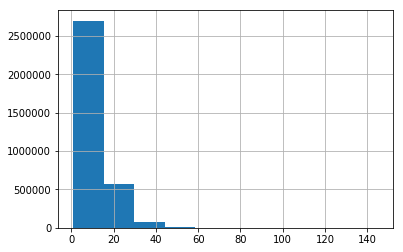

In [85]:
grouped_orders['product_id'].count().hist();

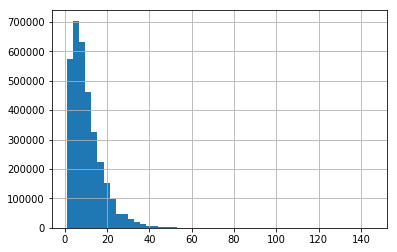

In [86]:
grouped_orders['product_id'].count().hist(bins=50);

In [91]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [94]:
orders.shape

(3421083, 7)

In [0]:
condition = (orders['user_id'] == 1) & (orders['order_number'] <= 2)
columns = ['order_id','user_id', 'order_number', 'order_dow', 'order_hour_of_day']
subset = orders[condition][columns]

In [95]:
subset.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day
0,2539329,1,1,2,8
1,2398795,1,2,3,7


# **Merge Dataframes**

In [96]:
columns = ['order_id','product_id','add_to_cart_order']
merged = pd.merge(subset, order_products[columns])
merged.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,product_id,add_to_cart_order
0,2539329,1,1,2,8,196,1
1,2539329,1,1,2,8,14084,2
2,2539329,1,1,2,8,12427,3
3,2539329,1,1,2,8,26088,4
4,2539329,1,1,2,8,26405,5


In [97]:
display(example)

In [98]:
final = pd.merge(merged, products[['product_id', 'product_name']])
final.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,product_id,add_to_cart_order,product_name
0,2539329,1,1,2,8,196,1,Soda
1,2398795,1,2,3,7,196,1,Soda
2,2539329,1,1,2,8,14084,2,Organic Unsweetened Vanilla Almond Milk
3,2539329,1,1,2,8,12427,3,Original Beef Jerky
4,2398795,1,2,3,7,12427,3,Original Beef Jerky


In [100]:
columns = ['user_id', 'order_id', 'order_number','order_dow','order_hour_of_day','add_to_cart_order', 'product_id','product_name']
final = final[columns]
final

,user_id,order_id,order_number,order_dow,order_hour_of_day,add_to_cart_order,product_id,product_name
0,1,2539329,1,2,8,1,196,Soda
1,1,2398795,2,3,7,1,196,Soda
2,1,2539329,1,2,8,2,14084,Organic Unsweetened Vanilla Almond Milk
3,1,2539329,1,2,8,3,12427,Original Beef Jerky
4,1,2398795,2,3,7,3,12427,Original Beef Jerky
5,1,2539329,1,2,8,4,26088,Aged White Cheddar Popcorn
6,1,2398795,2,3,7,5,26088,Aged White Cheddar Popcorn
7,1,2539329,1,2,8,5,26405,XL Pick-A-Size Paper Towel Rolls
8,1,2398795,2,3,7,2,10258,Pistachios
9,1,2398795,2,3,7,4,13176,Bag of Organic Bananas


In [101]:
final = final.sort_values(by=['order_number', 'add_to_cart_order'])
final

,user_id,order_id,order_number,order_dow,order_hour_of_day,add_to_cart_order,product_id,product_name
0,1,2539329,1,2,8,1,196,Soda
2,1,2539329,1,2,8,2,14084,Organic Unsweetened Vanilla Almond Milk
3,1,2539329,1,2,8,3,12427,Original Beef Jerky
5,1,2539329,1,2,8,4,26088,Aged White Cheddar Popcorn
7,1,2539329,1,2,8,5,26405,XL Pick-A-Size Paper Towel Rolls
1,1,2398795,2,3,7,1,196,Soda
8,1,2398795,2,3,7,2,10258,Pistachios
4,1,2398795,2,3,7,3,12427,Original Beef Jerky
9,1,2398795,2,3,7,4,13176,Bag of Organic Bananas
6,1,2398795,2,3,7,5,26088,Aged White Cheddar Popcorn


In [102]:
columns = [col.replace('_', ' ') for col in final.columns]
columns

['user id',
 'order id',
 'order number',
 'order dow',
 'order hour of day',
 'add to cart order',
 'product id',
 'product name']

In [103]:
final.columns = columns
final

,user id,order id,order number,order dow,order hour of day,add to cart order,product id,product name
0,1,2539329,1,2,8,1,196,Soda
2,1,2539329,1,2,8,2,14084,Organic Unsweetened Vanilla Almond Milk
3,1,2539329,1,2,8,3,12427,Original Beef Jerky
5,1,2539329,1,2,8,4,26088,Aged White Cheddar Popcorn
7,1,2539329,1,2,8,5,26405,XL Pick-A-Size Paper Towel Rolls
1,1,2398795,2,3,7,1,196,Soda
8,1,2398795,2,3,7,2,10258,Pistachios
4,1,2398795,2,3,7,3,12427,Original Beef Jerky
9,1,2398795,2,3,7,4,13176,Bag of Organic Bananas
6,1,2398795,2,3,7,5,26088,Aged White Cheddar Popcorn


In [104]:
display(example)

## Join Data Stretch Challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.



In [0]:
##### YOUR CODE HERE #####

## Reshape Data Stretch Challenge

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [0]:
##### YOUR CODE HERE #####